In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


As a former USA swim coach I found this dataset very interesting. I downloaded both sets of the dataframes for athletes and region. From there I build the dataframe around the summer Olympics ands swimming. 

In [2]:
athlete=pd.read_csv('athlete_events.csv')
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
region=pd.read_csv('noc_regions.csv')
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
df = pd.merge(athlete,region, how='outer', sort=True, on=['NOC'])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN


By merging the two datasets and creating the dataframe df_swim with only 8 features for columns. There were quite a few rows with missing data so I needed to clean the data further to make it work for the models I wanted to run. The age column had many missing values, however I noticed that mean age was in the 20s so I chose to make the rows with missing age values to be filled with the mean age of those that competed in swimming events at the summer Olympics. 

In [5]:
df_swim=df[['Sex','Age','Height','Team','Year','Season','City','Medal']]

In [6]:
age_array = df_swim[df["Age"]!=np.nan]["Age"]

df_swim['Age'].fillna(df_swim['Age'].mean(), inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


To make the Medals feature binary in the cell below I changed the medals awarded to either 1-4 depending on medal awarded or if they did not win a medal, which is probably the higher amount for competitors. 

In [7]:
def func(y):
        if y== 'Gold':
            return 1
        elif y== 'Silver':
            return 2
        elif y== 'Bronze':
            return 3
        else:
            return 4
df_swim['Medal_encoded']=df_swim['Medal'].apply(func)

print(df_swim)
        

       Sex        Age  Height         Team    Year  Season            City  \
0        M  25.556898     NaN  Afghanistan  1956.0  Summer       Melbourne   
1        M  28.000000     NaN  Afghanistan  1936.0  Summer          Berlin   
2        M  25.556898     NaN  Afghanistan  1948.0  Summer          London   
3        M  17.000000   156.0  Afghanistan  1980.0  Summer          Moskva   
4        M  22.000000     NaN  Afghanistan  1964.0  Summer           Tokyo   
5        M  25.556898     NaN  Afghanistan  1972.0  Summer          Munich   
6        M  17.000000     NaN  Afghanistan  1936.0  Summer          Berlin   
7        M  25.556898     NaN  Afghanistan  1948.0  Summer          London   
8        M  25.556898     NaN  Afghanistan  1948.0  Summer          London   
9        M  22.000000     NaN  Afghanistan  1936.0  Summer          Berlin   
10       M  25.556898     NaN  Afghanistan  1948.0  Summer          London   
11       M  25.000000   160.0  Afghanistan  1980.0  Summer      

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Curious about what the top ages were that were competing in the Olympics. Fun to see that there were swimmers as old as 97! Pretty impressive. 

In [8]:
df_swim.loc[lambda df:df_swim ['Age'] > 80, :]

,Sex,Age,Height,Team,Year,Season,City,Medal,Medal_encoded
38942,M,81.0,NaN,Canada,1948.0,Summer,London,NaN,4
87506,M,81.0,NaN,France,1924.0,Summer,Paris,NaN,4
92291,M,84.0,NaN,Great Britain,1948.0,Summer,London,NaN,4
251994,M,88.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,4
251995,M,88.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,4
251996,M,88.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,4
254942,M,96.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,4
265052,M,97.0,NaN,United States,1928.0,Summer,Amsterdam,NaN,4


Changing male and female features to integers so I can use them easily in models to help with predictions. Males are 1 and Females are 2

In [9]:
def func(X):
        if X== 'M':
            return 1
        elif X== 'F':
            return 2
        else:
            return 2
        
df_swim['Gender_encoded']=df_swim['Sex'].apply(func)
        

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Was curious what the age was for medal earned so I graphed it out using a seaborn scatter plot. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


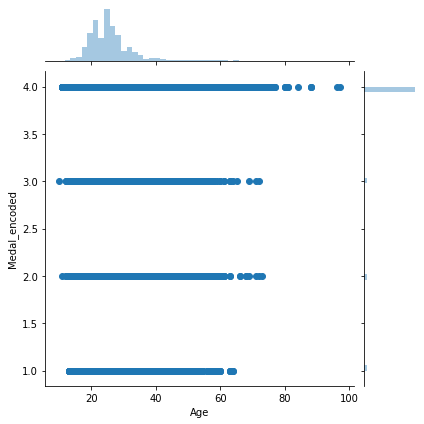

In [10]:
import seaborn as sns

sns.jointplot(x='Age', y='Medal_encoded', kind='scatter',data= df_swim)

Next I wanted to group the data by decade so that I could compare mean age with each decade. After creating decades, mean age by decade I then chose to show the data in a seaborn boxplot. I like this chart because not only does it show where the mean line is of the data it also shows the outliers. 

In [11]:
 df_swim['Decade'] = df_swim['Year'] // 10 * 10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_swim.groupby('Decade')['Age'].mean()

Decade
1890.0    24.428354
1900.0    26.817587
1910.0    27.462098
1920.0    28.261704
1930.0    28.839619
1940.0    28.276593
1950.0    26.040309
1960.0    24.774850
1970.0    24.099658
1980.0    23.946839
1990.0    24.634049
2000.0    25.656233
2010.0    26.078884
Name: Age, dtype: float64

In [13]:
df_swim['Mean_Age'] = df_swim['Age'].mean()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1, 'Decade vs the Age of Athlete Attending ')

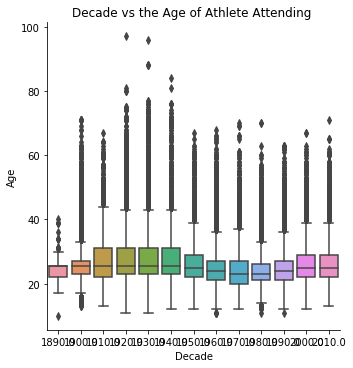

In [36]:
sns.catplot (x= 'Decade', y='Age', kind= 'box', data= df_swim)
plt.ylabel("Age") 
plt.xlabel("Decade")
plt.title ('Decade vs the Age of Athlete Attending ')    

Next are two box plots for each gender, Male (1) and Female (0). In the first graph it compares their age with the medal awarded and the second compares their height with the medal awarded. As you can see the age and height is pretty consistent among all 4 categories, showing that for Olympic swimmers they generally consist of competitors of the same age and similar height. 

Text(0.5, 1, 'Female Athletes Age versus Medal Won ')

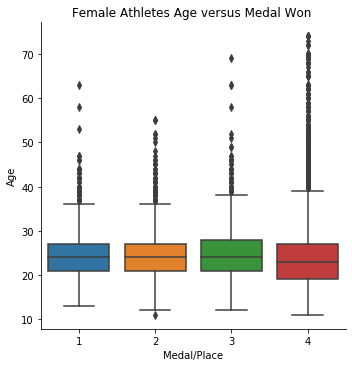

In [38]:
sns.catplot (x= 'Medal_encoded', y='Age', kind= 'box', data= df_swim[df_swim['Gender_encoded']==2])
plt.ylabel("Age") 
plt.xlabel("Medal/Place")
plt.title ('Female Athletes Age versus Medal Won ')    

Text(0.5, 1, 'Female Athletes Height versus Medal Won ')

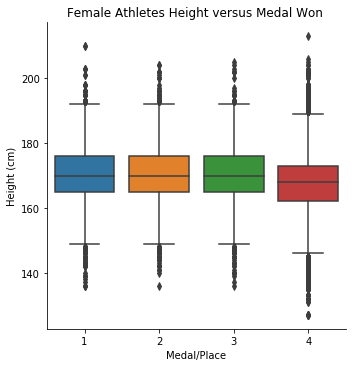

In [40]:
sns.catplot (x= 'Medal_encoded', y='Height', kind= 'box', data= df_swim[df_swim['Gender_encoded']==2])
plt.ylabel("Height (cm)") 
plt.xlabel("Medal/Place")
plt.title ('Female Athletes Height versus Medal Won ')  

Text(0.5, 1, 'Male Athletes Age versus Medal Won ')

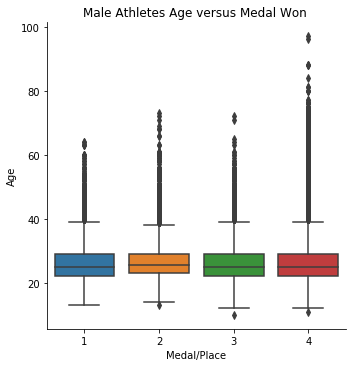

In [41]:
sns.catplot (x= 'Medal_encoded', y='Age', kind= 'box', data= df_swim[df_swim['Gender_encoded']==1])
plt.ylabel("Age") 
plt.xlabel("Medal/Place")
plt.title ('Male Athletes Age versus Medal Won ')    

Text(0.5, 1, 'Male Athletes Height versus Medal Won ')

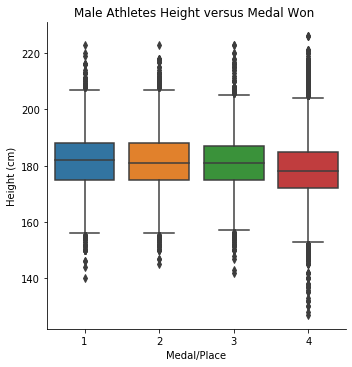

In [42]:
sns.catplot (x= 'Medal_encoded', y='Height', kind= 'box', data= df_swim[df_swim['Gender_encoded']==1])
plt.ylabel("Height (cm)") 
plt.xlabel("Medal/Place")
plt.title ('Male Athletes Height versus Medal Won ')  

After looking at these graphs it made me wonder what are the chances of just winning a medal, any medal. So to do that I changed the medals to a 1 if they won any sort of medal and 0 if they did not. 

In [19]:
def func(X):
        if X== 1:
            return 1
        elif X== 2:
            return 1
        elif X== 3:
            return 1
        else:
            return 0
        
df_swim['Medal_binary']=df_swim['Medal_encoded'].apply(func)
        

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In the following cells I have used Random Forest to help predict what the chances are of winning a medal. For the first model I chose to use Age and Height as the features to help predict medal outcome. It shows that the model runs 85% correctly, predicting that they will not win a medal. 

In [20]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = df_swim[['Age', 'Height']]
Y = df_swim['Medal_binary']
X= X.dropna(axis=1)

print (X.shape)
print (Y.shape)

rfc.fit(X,Y)
cross_val_score(rfc, X, Y, cv=5)

(271117, 1)
(271117,)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.85325686, 0.85325686, 0.85325686, 0.8532726 , 0.85326989])

In [21]:
from sklearn.metrics import confusion_matrix
target=df_swim['Medal_binary']
y_pred= rfc.predict(X) 
confusion_matrix(target, y_pred)

array([[231334,      0],
       [ 39783,      0]])

Seeing that the model predicts no one will win a medal, clearly the weight of winning no medal is very high. I chose to try and see how it would affect the model if I used a class_weight to balance the data as well as adding the Gender and tried running it again. This time in the model I used three features to see if that would help with the outcome. 

In [22]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(class_weight='balanced')
X = df_swim[['Height','Gender_encoded','Age']]
Y = df_swim['Medal_binary']
X= X.dropna(axis=1)

print (X.shape)
print (Y.shape)

rfc.fit(X,Y)
cross_val_score(rfc, X, Y, cv=5)


(271117, 2)
(271117,)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.4327604 , 0.42567867, 0.39757303, 0.38599856, 0.43548744])

In [23]:
from sklearn.metrics import confusion_matrix
target=df_swim['Medal_binary']
y_pred= rfc.predict(X) 
confusion_matrix(target, y_pred)

array([[100552, 130782],
       [ 14327,  25456]])

This prediction looks better than the previous one, predicting that 87,179 will recieve a medal 27,783 will not. The model also predicted that 12,000 would win a medal and they did not as well as 144,155 would not but they did in fact win a medal. 

This round I adjusted the class_weights myself. So if showed a 0 it was weighted only by 1 and if showed a 1 it was weighted by 5. As you can see for both the cross_val score and the confusion matrix this adjustment to the model worked better than the previous one. 

In [25]:
rfc = ensemble.RandomForestClassifier(class_weight={0:1,1:5})
X = df_swim[['Height','Gender_encoded','Age']]
Y = df_swim['Medal_binary']
X= X.dropna(axis=1)

print (X.shape)
print (Y.shape)

rfc.fit(X,Y)
cross_val_score(rfc, X, Y, cv=5)

(271117, 2)
(271117,)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.77753393, 0.77943346, 0.77393774, 0.77312211, 0.6697466 ])

In [26]:
from sklearn.metrics import confusion_matrix
target=df_swim['Medal_binary']
y_pred= rfc.predict(X) 
confusion_matrix(target, y_pred)

array([[202756,  28578],
       [ 33495,   6288]])

The predictions seem to be evening out a bit and having less issues with the false positives and falso negatives, however I think the model can do even better. So I am going to try adding the teams to the model, but first I need to create dummies out of the Team feature. 

In [27]:
pd.get_dummies(df_swim ['Team'])

,30. Februar,A North American Team,Acipactli,Acturus,Afghanistan,Akatonbo,Alain IV,Albania,Alcaid,Alcyon-6,...,Ylliam VII,Ylliam VIII,Yugoslavia,Yugoslavia-1,Yugoslavia-2,Zambia,Zefyros,Zimbabwe,Zut,rn-2
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = df_swim[['Age', 'Height','Team']]
Y = df_swim['Medal_binary']
X= X.dropna(axis=1)
X= pd.get_dummies(df_swim ['Team'])

print (X.shape)
print (Y.shape)

rfc.fit(X,Y)
cross_val_score(rfc, X, Y, cv=5)

(271117, 1184)
(271117,)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.85345972, 0.61690395, 0.73050679, 0.52737768, 0.37608351])

In [29]:
from sklearn.metrics import confusion_matrix
target=df_swim['Medal_binary']
y_pred= rfc.predict(X) 
confusion_matrix(target, y_pred)

array([[231070,    264],
       [ 38029,   1754]])

By adding the Team feature to the model I got a better cross_val score as well as a better outcome on the confusion matrix with less in the false positives and false negatives. I was still curious what would happen if I weighted the data like I had done previously without the team if that would help or hurt the model. 

In [30]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(class_weight='balanced')
X = df_swim[['Age', 'Height','Team']]
Y = df_swim['Medal_binary']
X= X.dropna(axis=1)
X= pd.get_dummies(df_swim ['Team'])

print (X.shape)
print (Y.shape)

rfc.fit(X,Y)
cross_val_score(rfc, X, Y, cv=5)

(271117, 1184)
(271117,)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.85368103, 0.59126955, 0.73443494, 0.52726703, 0.37656302])

In [31]:
from sklearn.metrics import confusion_matrix
target=df_swim['Medal_binary']
y_pred= rfc.predict(X) 
confusion_matrix(target, y_pred)

array([[139565,  91769],
       [ 13004,  26779]])

By doing this I lowered the false positives (so not winning a medal) and increased the false negatives (winning a medal). I think I would stick with the unweighted model for my predictions.

In the last two cells I wanted to compare how the KNN model would predict the outcome of medals. In the first model I did only features and in the second I did three with a bit of data cleaning on the height. As you can see with both the predictions are no medal, which makes sense, considering I did not weight the medals. 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = df_swim[['Age', 'Gender_encoded']]
Y = df_swim.Medal_binary
neighbors.fit(X,Y)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
neighbors.predict([[24, 0]])

array([1])

In [34]:
knn_data = df_swim[['Age', 'Height', 'Medal_binary']]
knn_data.dropna(subset=['Height'],inplace=True)
X = knn_data[['Age', 'Height']]
Y = knn_data['Medal_binary']
neighbors.fit(X,Y)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [35]:
neighbors.predict([[24, 180]])

array([0])